In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [15]:
%pip install fairlearn

### **LOAD BOSTON HOUSE PRICING DATASET**

In [16]:
# from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')
from fairlearn.datasets import fetch_boston

In [17]:
boston = fetch_boston()

In [18]:
type(boston)

sklearn.utils._bunch.Bunch

In [19]:
boston.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [20]:
# description of the dataset
print(boston.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

In [21]:
print(boston.target)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


In [22]:
type(boston.data)

pandas.core.frame.DataFrame

In [23]:
print(boston.data)

        CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [24]:
boston['data']

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [25]:
print(boston.feature_names)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


**PREPARING THE DATASET**

In [26]:
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [27]:
# output feature is present int he boston.target
dataset['Price'] = boston.target
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  Price    506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [29]:
# convert category dtypes to float dtypes
dataset['CHAS'] = dataset['CHAS'].astype('float')
dataset['RAD'] = dataset['RAD'].astype('float')

In [30]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [31]:
# summarizing data statistics
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [32]:
# check missing values
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

### **EXPLORATORY DATA ANALYSIS**

- for regression problem statements, it is important to find out how independent and output features are correlated

- high correlation between independent features = can remove 1 of the features. this is called **multi-collinearity**. (highly positively or negatively)

- correlation between independent features and the price

- linearity should the present in a dataset to create a better regression model

- linearity = x increases, y increases or x decreases so y decreases

In [33]:
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [34]:
# sns.pairplot(dataset)

Text(0, 0.5, 'Price')

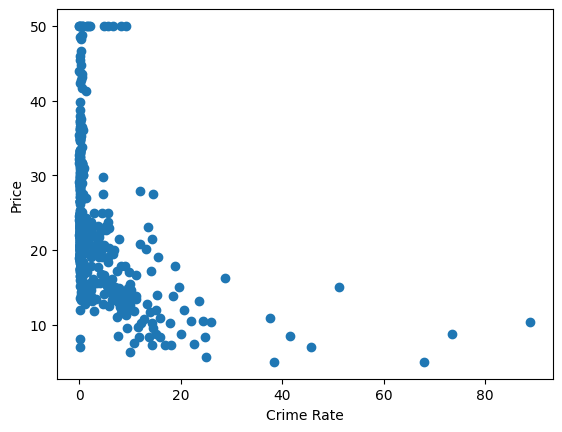

In [35]:
plt.scatter(dataset['CRIM'],dataset['Price'])
plt.xlabel('Crime Rate')
plt.ylabel('Price')

the 2 are inversely correlated

Text(0, 0.5, 'Price')

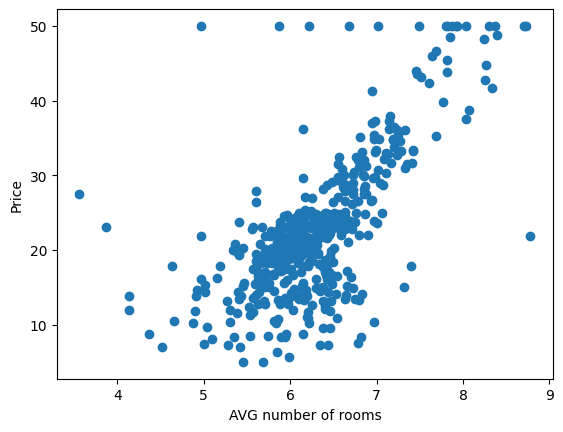

In [36]:
plt.scatter(dataset['RM'],dataset['Price'])
plt.xlabel('AVG number of rooms')
plt.ylabel('Price')

price increases with increase in the number of rooms

<Axes: xlabel='RM', ylabel='Price'>

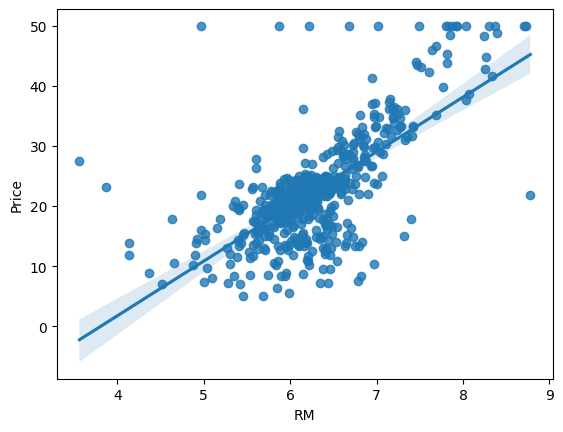

In [37]:
# linear regression plot
sns.regplot(x="RM", y="Price", data=dataset)

positive correlation between RM and the Price

<Axes: xlabel='LSTAT', ylabel='Price'>

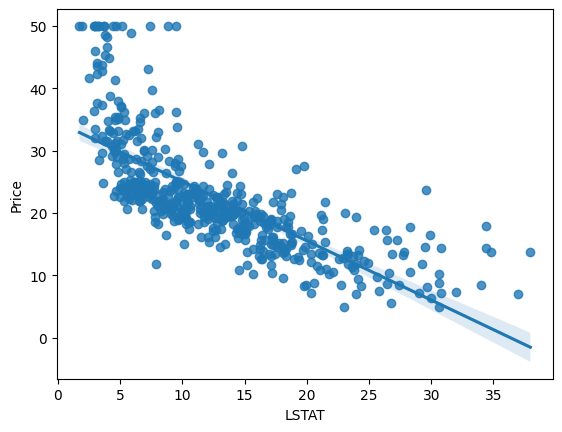

In [38]:
sns.regplot(x="LSTAT", y="Price", data=dataset)


negative correlation between the Lower status of the population and the price


<Axes: xlabel='CHAS', ylabel='Price'>

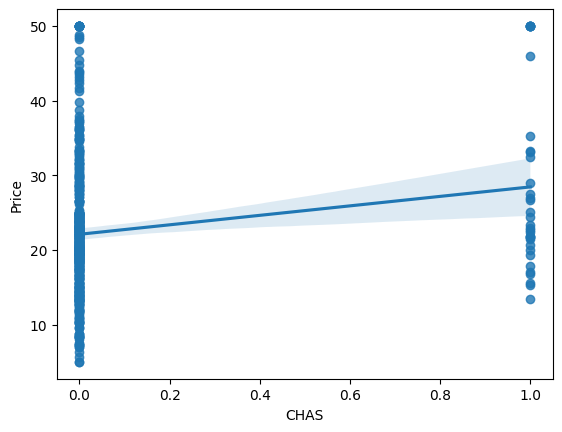

In [39]:
sns.regplot(x="CHAS", y="Price", data=dataset)


no correlation between CHAS and the price

<Axes: xlabel='PTRATIO', ylabel='Price'>

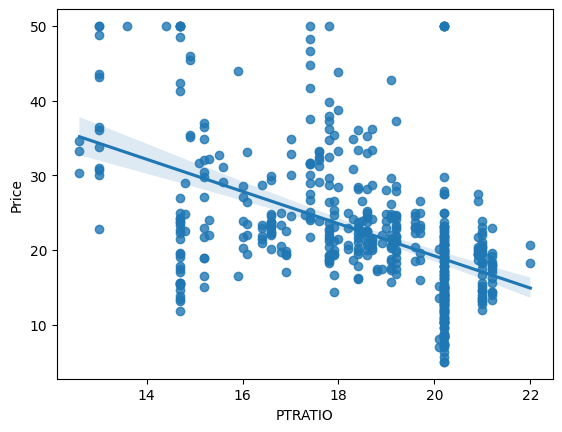

In [40]:
sns.regplot(x="PTRATIO", y="Price", data=dataset)


inverse relationship between the pupil-teacher ration by town and the price

## **MODEL PREPARATION**

In [41]:
# independent and dependent features

X = dataset.iloc [:,:-1]
y = dataset.iloc[:,-1]

In [42]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [43]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

**TRAIN-TEST SPLIT**

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
X_train.shape

(354, 13)

In [46]:
X_test.shape

(152, 13)

**STANDARDIZE THE DATASET**

- an important step is to normalize/standardize the data points to one scale
- use gradient descent to come to a global minima to make sure all independent features are on the same scale so that convergence happens quickly

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [48]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
X_train

array([[-0.41425879, -0.50512499, -1.29214218, ...,  0.18727079,
         0.39651419, -1.01531611],
       [-0.40200818, -0.50512499, -0.16208345, ..., -0.21208981,
         0.3870674 , -0.05366252],
       [-0.39721053, -0.50512499, -0.60948856, ..., -0.16771641,
         0.42854113, -0.31132373],
       ...,
       [-0.41604586,  3.03838247, -1.3166773 , ..., -0.56707702,
         0.35987906, -0.90549329],
       [ 0.92611293, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.87841346,  1.52750437],
       [-0.39030549, -0.50512499, -0.37135358, ...,  1.16348561,
        -3.32828832, -0.25218837]])

In [50]:
X_test

array([[-0.406801  , -0.50512499, -1.02225586, ..., -0.74457062,
         0.41241246, -0.47605794],
       [-0.41105674,  1.26662874, -0.68165068, ..., -0.30083661,
         0.42854113, -1.25185755],
       [-0.4051199 , -0.50512499,  2.39678516, ...,  0.8084984 ,
         0.35031705,  0.79535229],
       ...,
       [-0.35439903, -0.50512499, -0.71195877, ..., -0.38958342,
         0.25688594, -1.09697922],
       [ 0.25423453, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.98970133,  0.53487511],
       [ 0.77732457, -0.50512499,  1.00549958, ...,  0.8528718 ,
         0.33199949,  0.56585078]])

**TRAINING THE MODEL**

In [51]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [52]:
regression.fit(X_train, y_train)

LinearRegression()

**Print the coefficients and the intercept**

- the coeff are equal to the number of independent features

In [53]:
# print the coefficients
print(regression.coef_) #equal to the number of independent features

[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]


In [54]:
# print the intercept
print(regression.intercept_)

23.01581920903955


In [55]:
# on which parameters the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

**PREDICTION WITH TEST DATA**


- when we get pred, we can compare with y_test (true value for the X_test)

In [56]:
reg_pred = regression.predict(X_test)

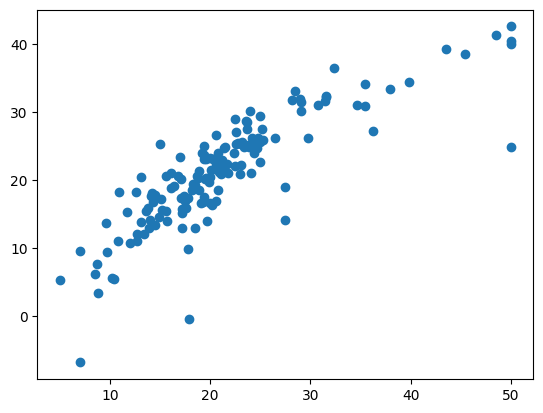

In [57]:
# plot a scatterplot for the predictions
plt.scatter(y_test, reg_pred)

plotting is linear = model has performed well

In [58]:
# residuals = error with respect to y_test and reg_pred
residuals = y_test - reg_pred
residuals

173    -5.048960
274    -4.095014
491    -1.811193
72     -2.603213
452    -2.755280
         ...    
441    -0.303672
23      1.114059
225    10.016575
433    -2.382863
447    -5.685618
Name: Price, Length: 152, dtype: float64

<Axes: xlabel='Price', ylabel='Density'>

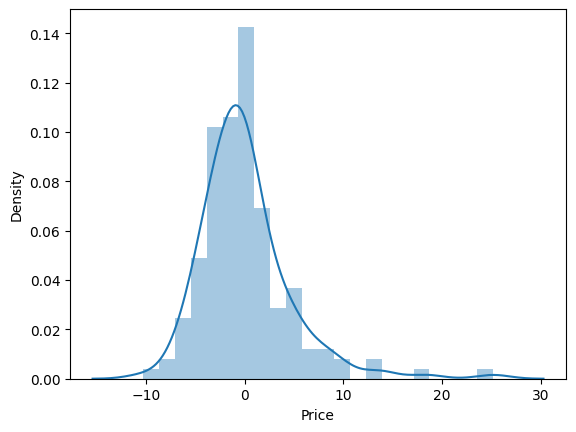

In [59]:
# plotting of residuals
sns.distplot(residuals, kde=True)

residuals range from -10 to +10


normal distribution is shown, with a few outliers

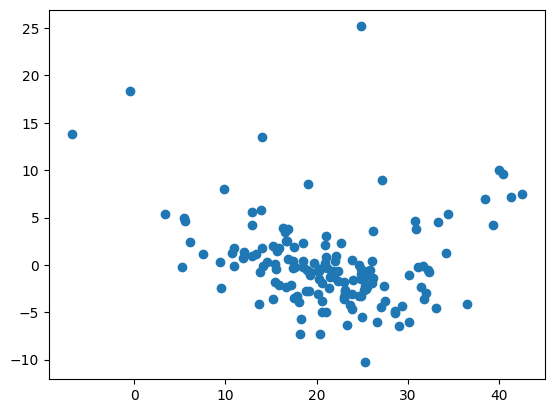

In [60]:
# scatterplot with respect to predictions and residuals
plt.scatter(reg_pred, residuals)

has been scattered uniformly, still indicates that the model is performing well

**PERFORMANCE METRICS**

In [61]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import root

In [62]:
print(mean_squared_error(y_test, reg_pred))
print(mean_absolute_error(y_test, reg_pred))
print(np.sqrt(mean_squared_error(y_test, reg_pred)))

21.51744423117721
3.1627098714574053
4.6386899261728205


**R SQUARED & ADJUSTED R SQUARED**

r^2: measures the variation that is explained by a regression model. This is positive if the model's prediction is better than a prediction.

> **r^2 = 1 - SSR/SST**

**R^2**: coefficient of determination

**SSR**: sum of square residuals

**SST**: total sum of squares

Adjusted r^2 will always be less than r^2

> **adj r^2 = 1 - [(1 - r2) * (n-1) / (n - k -1)]**

**r2**:

**n**: number of observations

**k**: number of predictors

---

Reference: [Demystifying R-Squared and Adjusted R-Squared](https://builtin.com/data-science/adjusted-r-squared)

In [63]:
from sklearn.metrics import r2_score
score = r2_score(y_test, reg_pred)
print(score)

0.7112260057484932


In [64]:
# display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6840226584639308

**PREDICTION WITH NEW DATA**

- reshape the data (1 row 13 columns)
- when you get new data, remember to standardize it

In [65]:
boston.data.shape

(506, 13)

In [77]:
boston.data.values

array([[0.00632, 18.0, 2.31, ..., 15.3, 396.9, 4.98],
       [0.02731, 0.0, 7.07, ..., 17.8, 396.9, 9.14],
       [0.02729, 0.0, 7.07, ..., 17.8, 392.83, 4.03],
       ...,
       [0.06076, 0.0, 11.93, ..., 21.0, 396.9, 5.64],
       [0.10959, 0.0, 11.93, ..., 21.0, 393.45, 6.48],
       [0.04741, 0.0, 11.93, ..., 21.0, 396.9, 7.88]], dtype=object)

In [78]:
boston.data.values[0].reshape(1,-1)

array([[0.00632, 18.0, 2.31, '0', 0.538, 6.575, 65.2, 4.09, '1', 296.0,
        15.3, 396.9, 4.98]], dtype=object)

In [80]:
## transform new data
scaler.transform(boston.data.values[0].reshape(1,-1))

array([[-0.41709233,  0.29216419, -1.27338003, -0.28154625, -0.16513629,
         0.34715902, -0.13030059,  0.15267164, -0.97798895, -0.66777595,
        -1.32142483,  0.42854113, -1.04769976]])

In [81]:
# predict
regression.predict(scaler.transform(boston.data.values[0].reshape(1,-1)))

array([30.08649576])

**PICKLING THE MODEL FILE FOR DEPLOYMENT**

In [69]:
import pickle

In [71]:
# model, filename, open in write-byte mode
pickle.dump(regression, open('regression_model.pkl','wb'))

In [73]:
# load pickled model
pickled_model = pickle.load(open('regression_model.pkl','rb'))

In [84]:
# prediction
pickled_model.predict(scaler.transform(boston.data.values[0].reshape(1,-1)))

array([30.08649576])

## RESOURCES:

- [Youtube: End to End ML project](https://youtu.be/MJ1vWb1rGwM?si=DHLh2cwhiyV8qfD-)

- [Dynamic Pricing Explained](https://www.altexsoft.com/blog/dynamic-pricing-explained-use-in-revenue-management-and-pricing-optimization/)

- [Price Optimization with Machine Learning](https://www.netguru.com/blog/price-optimization-with-machine-learning)

- [ML for Retail Price Suggestiont](https://towardsdatascience.com/machine-learning-for-retail-price-suggestion-with-python-64531e64186d)

- [Mastering the art of Pricing Optimization](https://towardsdatascience.com/mastering-the-art-of-pricing-optimization-a-data-science-solution-eb8befb79425)

- [ML for Ecommerce: Price Optimization](https://medium.com/@amazinum/machine-learning-for-e-commerce-price-optimization-fcc8889d8c1e)

- [Price Optimization Machine Learning](https://www.projectpro.io/article/price-optimization-machine-learning/838)

- [What is dynamic pricing and how does it affect ecommerce](https://www.business.com/articles/what-is-dynamic-pricing-and-how-does-it-affect-ecommerce/)